## PART1-Eigenfaces(NP-PCA-Eigenface/RF & TF-PCA-Eigenface/RF based face recognition)

In [65]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [66]:
pip install scikit-learn scipy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [45]:
#Loading the Labeled Faces in the Wild dataset
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [46]:
# Storing the number of images, height and width of each image
n_samples, h, w = lfw_people.images.shape
n_samples, h, w

(1288, 50, 37)

In [56]:
# Extracting the number of features in the LFW data set
X = lfw_people.data
n_features = X.shape[1]
n_features

1850

In [58]:
# Finding the number of classes in the LFW data set
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]
n_classes

7

In [49]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [10]:
#It is important in machine learning to split the data accordingly into training and testing sets to
#avoid contamination of the model. Ideally, you should also have a validation set.
# Split into a training set and a test set using a stratified k fold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

n_components = 150

In [12]:
#Compute the PCA via eigen-decomposition of the data matrix X after the mean of the training set
#is removed. This results in a model with variations from the mean. We also transform the training and
#testing data into ’face space’, i.e. the learned sub space of the eigen-faces.



In [13]:
# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

In [14]:
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

(966, 150)
(322, 150)


In [15]:
# Finally, plot the resulting eigen-vectors of the face PCA model, AKA the eigenfaces
import matplotlib.pyplot as plt

In [16]:
# Qualitative evaluation of the predictions using matplotlib

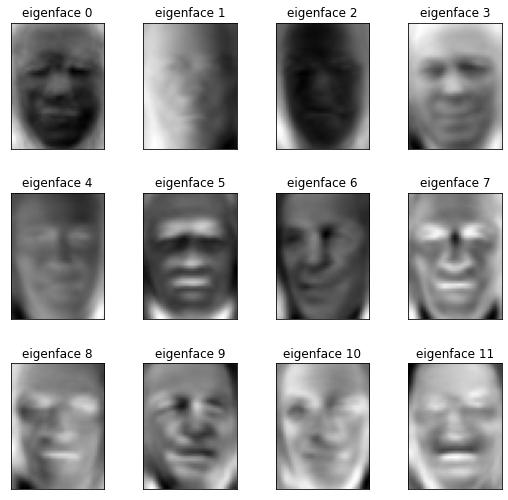

In [17]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [18]:
# To evaluate the performance of the dimensionality reduction via a compactness plot

(966,)


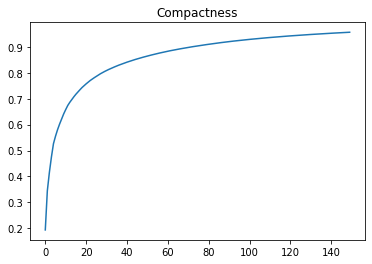

In [19]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [20]:
# To Using the PCA ’face space’ as features and build a random forest classifier to classify the faces according
#to the labels. We then view its classification performance.

X_transformed.shape


(966, 150)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 4 3 3 3 3 4 3 3 4 1 1 3 3 1 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 1 1 3 3 3 3 4 3 3 3 3 3 6 2 1 3 4 3 1 1 6 6 3 4 1 4 1 3 6 6 3 3
 3 2 3 1 1 3 4 3 3 3 3 3 3 3 3 3 3 6 3 3 1 3 3 1 3 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 1 4 1 3 1 3 3 1 3 4 4 3 1 3 6 6 6 3 3 6 3 3 1 3 1 3 3 1 3 5 1 3
 6 1 1 3 3 3 3 3 6 3 3 3 6 5 3 1 3 3 5 1 3 3 1 3 3 1 5 3 3 2 3 3 3 3 3 3 3
 3 3 3 1 2 4 3 2 3 6 3 3 3 3 6 3 3 3 2 3 3 4 2 6 3 3 5 3 3 3 6 3 2 3 3 6 3
 3 1 1 3 3 3 1 3 3 3 3 0 3 1 3 3 3 3 3 4 3 3 3 3 3 3 3 4 4 3 3 4 3 4 1 1 3
 3 3 3 3 1 3 6 6 1 3 1 1 1 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 4 3 3 3
 3 3 3 3 3 6 3 2 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 4 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True False False False  True
 False  T

In [22]:
# Precision(quality)= TP/TP+FP,Recall(remember some are missed !)= TP/TP+FN. Both are the highest the better.

In [50]:
# PCA with TF(instead of NP)BAsed Face recognition

In [68]:
import tensorflow as tf

In [67]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#The functionality of numpy.mean and tensorflow.reduce_mean are the same.c = np.array([[3.,4], [5.,6], [6.,7]])
#print(np.mean(c,1))

#Mean = tf.reduce_mean(c,1)
#with tf.Session() as sess:
    #result = sess.run(Mean)
    #print(result)
#Output

#[ 3.5  5.5  6.5]
#[ 3.5  5.5  6.5]
#Here you can see that when axis(numpy) or reduction_indices(tensorflow) is 1, it computes mean across (3,4) and (5,6) and (6,7), so 1 defines across which axis the mean is computed. When it is 0, the mean is computed across(3,5,6) and (4,6,7), and so on. I hope you get the idea.

In [31]:
# Center data(normalize by calculating the mean and removing the mean)
mean_train = tf.reduce_mean(X_train, axis=0)
X_train -= mean_train

mean_test = tf.reduce_mean(X_test, axis=0)
X_test -= mean_test

In [32]:
# Implementing singular value decomposition on centered train and test LFW data sets using tensorflow
s_train, u_train, v_train = tf.linalg.svd(X_train,full_matrices=False)
s_test, u_test, v_test = tf.linalg.svd(X_test,full_matrices=False)

In [33]:
# Right singular vector in tensorflow needs to be applied tf.linalg.adjoint to extract the top 150 principal components
v_train_adj = tf.linalg.adjoint(v_train)
components_train = v_train_adj[:n_components]

In [34]:
components_train

<tf.Tensor: shape=(150, 1850), dtype=float32, numpy=
array([[-0.00683411, -0.00751215, -0.0091807 , ..., -0.01421067,
        -0.01285381, -0.01177941],
       [-0.02300883, -0.02153285, -0.02274897, ...,  0.04403267,
         0.04320138,  0.04226772],
       [ 0.02185677,  0.02013558,  0.01897719, ...,  0.05728262,
         0.05086858,  0.04724893],
       ...,
       [-0.05292934, -0.01479527,  0.01214095, ..., -0.03065125,
        -0.02561183,  0.03245883],
       [ 0.02890081,  0.00192258,  0.01828866, ...,  0.03043999,
        -0.02416596, -0.03625777],
       [ 0.08416232,  0.01718829, -0.03990278, ...,  0.0023837 ,
         0.01691055,  0.04615206]], dtype=float32)>

In [35]:
eigenfaces_train = tf.reshape(components_train,[n_components, h, w])

In [36]:
eigenfaces_train

<tf.Tensor: shape=(150, 50, 37), dtype=float32, numpy=
array([[[-0.00683411, -0.00751215, -0.0091807 , ..., -0.00969871,
         -0.00899152, -0.00930517],
        [-0.00728524, -0.00841976, -0.01084004, ..., -0.01018027,
         -0.00921194, -0.00977229],
        [-0.00828153, -0.01002304, -0.01281665, ..., -0.01127213,
         -0.00974056, -0.01002432],
        ...,
        [-0.00361067, -0.00369118, -0.00610599, ..., -0.01592616,
         -0.01441486, -0.01343251],
        [-0.00528679, -0.00519285, -0.00625763, ..., -0.01546607,
         -0.01349356, -0.01246521],
        [-0.00624801, -0.00626496, -0.00675036, ..., -0.01421067,
         -0.01285381, -0.01177941]],

       [[-0.02300883, -0.02153285, -0.02274897, ...,  0.02109651,
          0.02166516,  0.02133396],
        [-0.02268487, -0.02194523, -0.02448395, ...,  0.02175772,
          0.02232642,  0.02191341],
        [-0.02292292, -0.02327838, -0.02639803, ...,  0.0228834 ,
          0.02309853,  0.02302811],
        ...,

In [37]:
# Transforming the centered train and test data into PCA subspace by applying dot product on centered data and the transpose
# of the components vector
X_transformed_train = tf.tensordot(X_train, tf.transpose(components_train),axes=1)
print(X_transformed_train)
X_transformed_test = tf.tensordot(X_test, tf.transpose(components_train),axes=1)
print(X_transformed_test)

tf.Tensor(
[[-1.4049011e+03  6.5393732e+02  9.0153619e+02 ...  5.7857823e-01
  -2.5167892e+01  1.4963894e+01]
 [ 9.3691461e+02 -3.7297705e+02  2.2833524e+02 ... -1.7624979e+01
   4.1385202e+00 -1.6175224e+01]
 [-5.3696490e+02  1.3008293e+01 -1.0248406e+02 ...  5.0065384e+00
   1.5467336e+01  3.1479568e+01]
 ...
 [-5.3550739e+02 -2.3201241e+01 -9.0631546e+01 ...  3.3693703e+01
   1.9237015e+01  2.9976997e+01]
 [-1.8815399e+02 -5.2445166e+02 -9.6145370e+01 ...  2.6286396e+01
   1.3080284e+01  8.5989628e+00]
 [-9.3093414e+02  7.0741669e+02  6.7074654e+01 ...  2.8696430e+01
   6.4591606e+01  8.6917725e+00]], shape=(966, 150), dtype=float32)
tf.Tensor(
[[-1.0329314e+03  1.1404209e+03 -4.0115833e+02 ... -2.2598400e+00
  -5.5005947e+01  4.6564392e+01]
 [-6.4381348e+02 -9.6691547e+02 -2.9849792e+02 ...  4.5812988e+01
  -1.9224520e+00  1.4535675e+01]
 [-7.1075977e+02  1.6347693e+02 -5.1524359e+02 ... -1.7704151e+01
   2.5692917e+01 -4.9514187e+01]
 ...
 [ 2.7064610e+01  4.3190436e+02  3.5650769

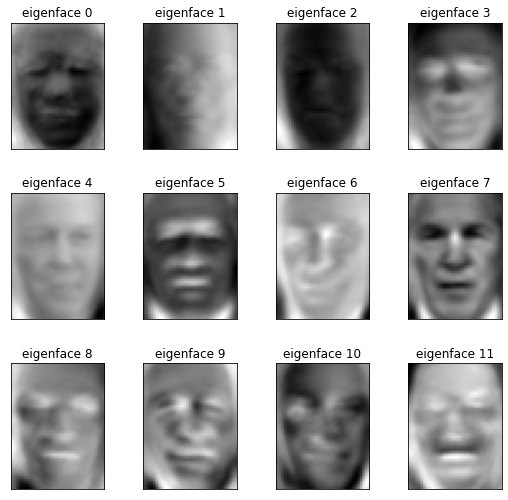

In [38]:
plot_gallery(eigenfaces_train.numpy(),eigenface_titles,h,w)
plt.show()

# Part 2-CNN based classifier

In [86]:
###SELFLEARNING
#42 is the Answer to the Ultimate Question of Life, the Universe, and Everything. 
#On a serious note, random_state simply sets a seed to the random generator, 
#so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [59]:
## Splitting the LFW data set into test and train 
xlfw_train, xlfw_test, ylfw_train, ylfw_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [60]:
# Segregating the training set into training and validation data set, normalising and reshaping them
xlfw_train, xlfw_val = xlfw_train[:500]/255.0, xlfw_train[500:]/255.0
ylfw_train, ylfw_val = ylfw_train[:500], ylfw_train[500:]

xlfw_train = xlfw_train.reshape(500,50,37,1)
xlfw_val = xlfw_val.reshape(466,50,37,1)

xlfw_test = xlfw_test/255.0
xlfw_test = xlfw_test.reshape(322,50,37,1)

In [78]:
# Loading the necessary Keras packages
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [79]:
# Converting the target variables into class matrix
ylfw_train = to_categorical(ylfw_train)
ylfw_test = to_categorical(ylfw_test)
ylfw_val = to_categorical(ylfw_val)

In [ ]:
###SELF LEARNING
#https://deeplizard.com/learn/video/FK77zZxaBoI
#We can see that the first layer, the input layer, consists of eight nodes. Each of the eight nodes in this layer represents an individual feature from a given sample in our dataset.
#This tells us that a single sample from our dataset consists of eight dimensions. When we choose a sample from our dataset and pass this sample to the model, each of the eight values contained in the sample will be provided to a corresponding node in the input layer.
#We can see that each of the eight input nodes are connected to every node in the next layer.
#Each connection between the first and second layers transfers the output from the previous node to the input of the receiving node (left to right). The two layers in the middle that have six nodes each are hidden layers simply because they are positioned between the input and output layers.
#Each connection between two nodes has an associated weight, which is just a number.
#Each weight represents the strength of the connection between the two nodes. When the network receives an input at a given node in the input layer, this input is passed to the next node via a connection, and the input will be multiplied by the weight assigned to that connection.
#For each node in the second layer, a weighted sum is then computed with each of the incoming connections. This sum is then passed to an activation function, which performs some type of transformation on the given sum. For example, an activation function may transform the sum to be a number between zero and one. The actual transformation will vary depending on which activation function is used.
#Once we obtain the output for a given node, the obtained output is the value that is passed as input to the nodes in the next layer.
#This process continues until the output layer is reached. The number of nodes in the output layer depends on the number of possible output or prediction classes we have. In our example, we have four possible prediction classes.
#As the model learns, the weights at all connections are updated and optimized so that the input data point maps to the correct output prediction class. 
#layers = [
    #Dense(units=6, input_shape=(8,), activation='relu'),
    #Dense(units=6, activation='relu'),
    #Dense(units=4, activation='softmax')
#]
#Notice how the first Dense object specified in the array is not the input layer. The first Dense object is the first hidden layer. The input layer is specified as a parameter to the first Dense object’s constructor.
#Our input shape is eight. This is why our input shape is specified as input_shape=(8,). Our first hidden layer has six nodes as does our second hidden layer, and our output layer has four nodes.


In [80]:
# Dense Only Layer
model_dense = Sequential()
model_dense.add(Flatten())
model_dense.add(Dense(128,activation = 'relu'))
model_dense.add(Dense(64,activation = 'relu'))
model_dense.add(Dense(32,activation = 'relu'))
model_dense.add(Dense(16,activation = 'relu'))
model_dense.add(Dense(7,activation = 'softmax'))


In [82]:
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history_dense = model_dense.fit(xlfw_train, ylfw_train, validation_data=(xlfw_val, ylfw_val),batch_size = 64, epochs=100)

Train on 500 samples, validate on 466 samples
Epoch 1/100
500/500 [==============================] - 1s 1ms/sample - loss: 1.7913 - accuracy: 0.3640 - val_loss: 1.7662 - val_accuracy: 0.3991
Epoch 2/100
500/500 [==============================] - 0s 92us/sample - loss: 1.7622 - accuracy: 0.3960 - val_loss: 1.7082 - val_accuracy: 0.3991
Epoch 3/100
500/500 [==============================] - 0s 80us/sample - loss: 1.7065 - accuracy: 0.3960 - val_loss: 1.6636 - val_accuracy: 0.3991
Epoch 4/100
500/500 [==============================] - 0s 82us/sample - loss: 1.6908 - accuracy: 0.3960 - val_loss: 1.6478 - val_accuracy: 0.4034
Epoch 5/100
500/500 [==============================] - 0s 80us/sample - loss: 1.6790 - accuracy: 0.4180 - val_loss: 1.7012 - val_accuracy: 0.3991
Epoch 6/100
500/500 [==============================] - 0s 82us/sample - loss: 1.6817 - accuracy: 0.4160 - val_loss: 1.6521 - val_accuracy: 0.4013
Epoch 7/100
500/500 [==============================] - 0s 82us/sample - loss: 1

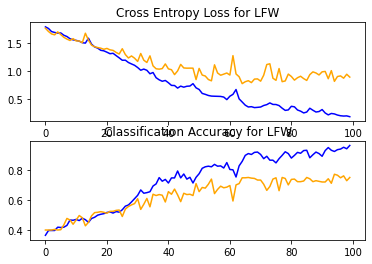

In [85]:
#traing vs evaluation(Loss and Accuracy)
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss for LFW')
plt.plot(history_dense.history['loss'], color='blue', label='train')
plt.plot(history_dense.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for LFW')
plt.plot(history_dense.history['accuracy'], color='blue', label='train')
plt.plot(history_dense.history['val_accuracy'], color='orange', label='test')

In [84]:
##Performance testing
#On test data(x_test to prediction & y_test)
ylfw_pred_dense = model_dense.predict_classes(xlfw_test)
ylfw_test_dense = np.argmax(ylfw_test,axis=1)
print(classification_report(ylfw_test_dense, ylfw_pred_dense))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55        13
           1       0.88      0.75      0.81        60
           2       0.67      0.67      0.67        27
           3       0.88      0.85      0.86       146
           4       0.68      0.76      0.72        25
           5       0.87      0.87      0.87        15
           6       0.57      0.69      0.62        36

    accuracy                           0.78       322
   macro avg       0.72      0.74      0.73       322
weighted avg       0.80      0.78      0.79       322



In [87]:
###SELFLEARNING
#https://deeplizard.com/learn/video/YRhxdVk_sIs
#Suppose that this grayscale image (single color channel) of a seven from the MNIST data set is our input:
#Let’s suppose that we have four 3 x 3 filters for our first convolutional layer, and these filters are filled with the values you see below. These values can be represented visually by having -1s correspond to black, 1s correspond to white, and 0s correspond to grey.
#The sliding is referred to as convolving, so really, we should say that this filter is going to convolve across each 3 x 3 block of pixels from the input.
#If we convolve our original image of a seven with each of these four filters individually, this is what the output would look like for each filter:
#We can see that all four of these filters are detecting edges. In the output channels, the brightest pixels can be interpreted as what the filter has detected. 
#The amazing thing is that the pattern detectors are derived automatically by the network. The filter values start out with random values, and the values change as the network learns during training. The pattern detecting capability of the filters emerges automatically.

In [88]:
#Initialising the Sequential model for Convolutional Layers
model_lfw = Sequential()

In [89]:
# Adding layers to the model
model_lfw.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(50,37,1)))
model_lfw.add(Conv2D(32, kernel_size=3, activation='relu'))
model_lfw.add(Flatten())
model_lfw.add(Dense(7, activation='softmax'))

In [90]:
model_lfw.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
history_lfw = model_lfw.fit(xlfw_train, ylfw_train, validation_data=(xlfw_val, ylfw_val),batch_size = 64, epochs=100)

Train on 500 samples, validate on 466 samples
Epoch 1/100
500/500 [==============================] - 3s 6ms/sample - loss: 1.8187 - accuracy: 0.3460 - val_loss: 1.7049 - val_accuracy: 0.3991
Epoch 2/100
500/500 [==============================] - 0s 130us/sample - loss: 1.6743 - accuracy: 0.3960 - val_loss: 1.6467 - val_accuracy: 0.3991
Epoch 3/100
500/500 [==============================] - 0s 132us/sample - loss: 1.5766 - accuracy: 0.4140 - val_loss: 1.5315 - val_accuracy: 0.4442
Epoch 4/100
500/500 [==============================] - 0s 132us/sample - loss: 1.3882 - accuracy: 0.4840 - val_loss: 1.3469 - val_accuracy: 0.5043
Epoch 5/100
500/500 [==============================] - 0s 132us/sample - loss: 1.0607 - accuracy: 0.6660 - val_loss: 1.2709 - val_accuracy: 0.4957
Epoch 6/100
500/500 [==============================] - 0s 130us/sample - loss: 0.8219 - accuracy: 0.7260 - val_loss: 1.1102 - val_accuracy: 0.6330
Epoch 7/100
500/500 [==============================] - 0s 134us/sample - l

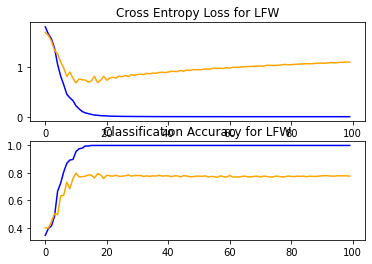

In [92]:
# Plotting Cross Entropy Loss and Classification Accuracy for training and val LFW data
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss for LFW')
plt.plot(history_lfw.history['loss'], color='blue', label='train')
plt.plot(history_lfw.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for LFW')
plt.plot(history_lfw.history['accuracy'], color='blue', label='train')
plt.plot(history_lfw.history['val_accuracy'], color='orange', label='test')

In [93]:
# Classification Report
ylfw_pred = model_lfw.predict_classes(xlfw_test)
ylfw_test = np.argmax(ylfw_test,axis=1)
print(classification_report(ylfw_test, ylfw_pred))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58        13
           1       0.83      0.80      0.81        60
           2       0.62      0.67      0.64        27
           3       0.80      0.90      0.85       146
           4       0.61      0.44      0.51        25
           5       1.00      0.33      0.50        15
           6       0.72      0.72      0.72        36

    accuracy                           0.77       322
   macro avg       0.75      0.63      0.66       322
weighted avg       0.77      0.77      0.76       322

